In [1]:
import numpy as np
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from utils import load_env_file, set_mpl_configs
from utils import leave_percentile, distribution_analysis

load_env_file()
set_mpl_configs()

DATA_DIR = os.getenv('DATA_DIR')
print('DATA_DIR: {}'.format(DATA_DIR))

load env file
  root dir:
    /home/k/Repo/IBD-EDA
  current system:
    Linux
  load .env.linux
  loaded data dir:
    /home/k/Nutstore Files/毕设-EHR/DB
done.
set matplotlib configs
  font family:
    ['Times New Roman']
done.
DATA_DIR: /home/k/Nutstore Files/毕设-EHR/DB


In [2]:
with open('../data/ibd_demo.json', 'r') as f:
    data = json.loads(f.read())
    
both_ibd_patients: list = data['both_ibd']
only_uc_patients: list = data['only_uc']
only_cd_patients: list = data['only_cd']

# Admission LOS

In [3]:
df = pd.read_csv(os.path.join(DATA_DIR, 'outcome', 'admission_stay.csv'))

In [4]:
for _column in ['admittime', 'dischtime', 'edregtime', 'edouttime']:
    # 入院 出院 进入Ed 离开Ed
    df[_column] = pd.to_datetime(df[_column])
    
# for i ,_anchor_year in enumerate(df['anchor_year']):
#     df.loc[i, 'anchor_year'] = pd.to_datetime(datetime(year=_anchor_year, month=1, day=1))

df.head(2)

,subject_id,hadm_id,admission_type,anchor_year,admittime,dischtime,edregtime,edouttime,deathtime
0,10098672,21229395.0,EW EMER.,2140,2142-05-16 04:04:00,2142-05-23 14:15:00,2142-05-15 15:49:00,2142-05-16 05:45:00,NaN
1,10098672,21259834.0,EW EMER.,2140,2141-04-13 17:30:00,2141-04-17 19:17:00,2141-04-13 12:17:00,2141-04-13 18:47:00,NaN


In [5]:
df.groupby('subject_id').agg({
    'anchor_year': 'first',
    'admittime': 'first',
    'dischtime': 'first'
})

,anchor_year,admittime,dischtime
subject_id,,,
10001186,2188,2190-07-19 07:15:00,2190-07-21 12:20:00
10007174,2162,2164-03-02 22:52:00,2164-03-04 18:50:00
10018852,2118,2119-06-29 21:20:00,2119-07-01 19:41:00
10024331,2140,2140-05-23 02:40:00,2140-05-24 14:15:00
10025647,2175,2180-11-18 10:42:00,2180-11-21 13:00:00
...,...,...,...
19971435,2116,2116-11-06 09:05:00,2116-11-07 17:24:00
19980334,2114,2115-11-29 17:57:00,2115-12-02 15:34:00
19985000,2166,2167-11-28 15:57:00,2167-12-02 11:59:00


In [6]:
df['los_ad'] = df['dischtime'] - df['admittime']
df['los_dp'] = df['edouttime'] - df['edregtime']

df.head()

,subject_id,hadm_id,admission_type,anchor_year,admittime,dischtime,edregtime,edouttime,deathtime,los_ad,los_dp
0,10098672,21229395.0,EW EMER.,2140,2142-05-16 04:04:00,2142-05-23 14:15:00,2142-05-15 15:49:00,2142-05-16 05:45:00,NaN,7 days 10:11:00,0 days 13:56:00
1,10098672,21259834.0,EW EMER.,2140,2141-04-13 17:30:00,2141-04-17 19:17:00,2141-04-13 12:17:00,2141-04-13 18:47:00,NaN,4 days 01:47:00,0 days 06:30:00
2,10098672,21921527.0,URGENT,2140,2141-06-29 22:55:00,2141-07-03 16:52:00,NaT,NaT,NaN,3 days 17:57:00,NaT
3,10098672,24843492.0,SURGICAL SAME DAY ADMISSION,2140,2142-05-06 07:15:00,2142-05-11 13:39:00,NaT,NaT,NaN,5 days 06:24:00,NaT
4,10098672,26570321.0,EW EMER.,2140,2142-01-20 23:24:00,2142-01-28 18:47:00,2142-01-20 19:54:00,2142-01-21 01:07:00,NaN,7 days 19:23:00,0 days 05:13:00


In [7]:
stats = df.groupby('subject_id').agg({
    'los_ad': ['mean', 'min', 'max', 'count'],
    'los_dp': ['mean', 'min', 'max', 'count']
})

stats.head()

los_ad                                        \
                                mean             min             max count   
subject_id                                                                   
10001186             1 days 20:00:40 1 days 07:50:00 2 days 05:05:00     9   
10007174             1 days 10:08:40 0 days 10:19:00 2 days 00:09:00     3   
10018852             4 days 05:27:00 1 days 22:21:00 8 days 08:00:00     3   
10024331   3 days 11:38:47.142857142 0 days 20:02:00 9 days 05:13:00    28   
10025647             3 days 17:28:45 0 days 19:03:00 9 days 21:08:00    16   

                              los_dp                                        
                                mean             min             max count  
subject_id                                                                  
10001186             0 days 06:11:00 0 days 06:11:00 0 days 06:11:00     3  
10007174             0 days 13:17:20 0 days 06:03:00 0 days 22:05:00     3  
10018852             0 days 10:07:00 0 days 10:07:00 0 days 10:07:00     1  
10024331             0 days 06:19:15 0 days 02:15:00 0 days 11:38:00    24  
10025647   0 days 08:29:42.857142857 0 days 03:20:00 1 days 08:14:00    14

In [9]:
data = stats['los_ad']['mean']

data = np.array(data)

data = data.astype(np.int64) / 1e9

data = leave_percentile(data)

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

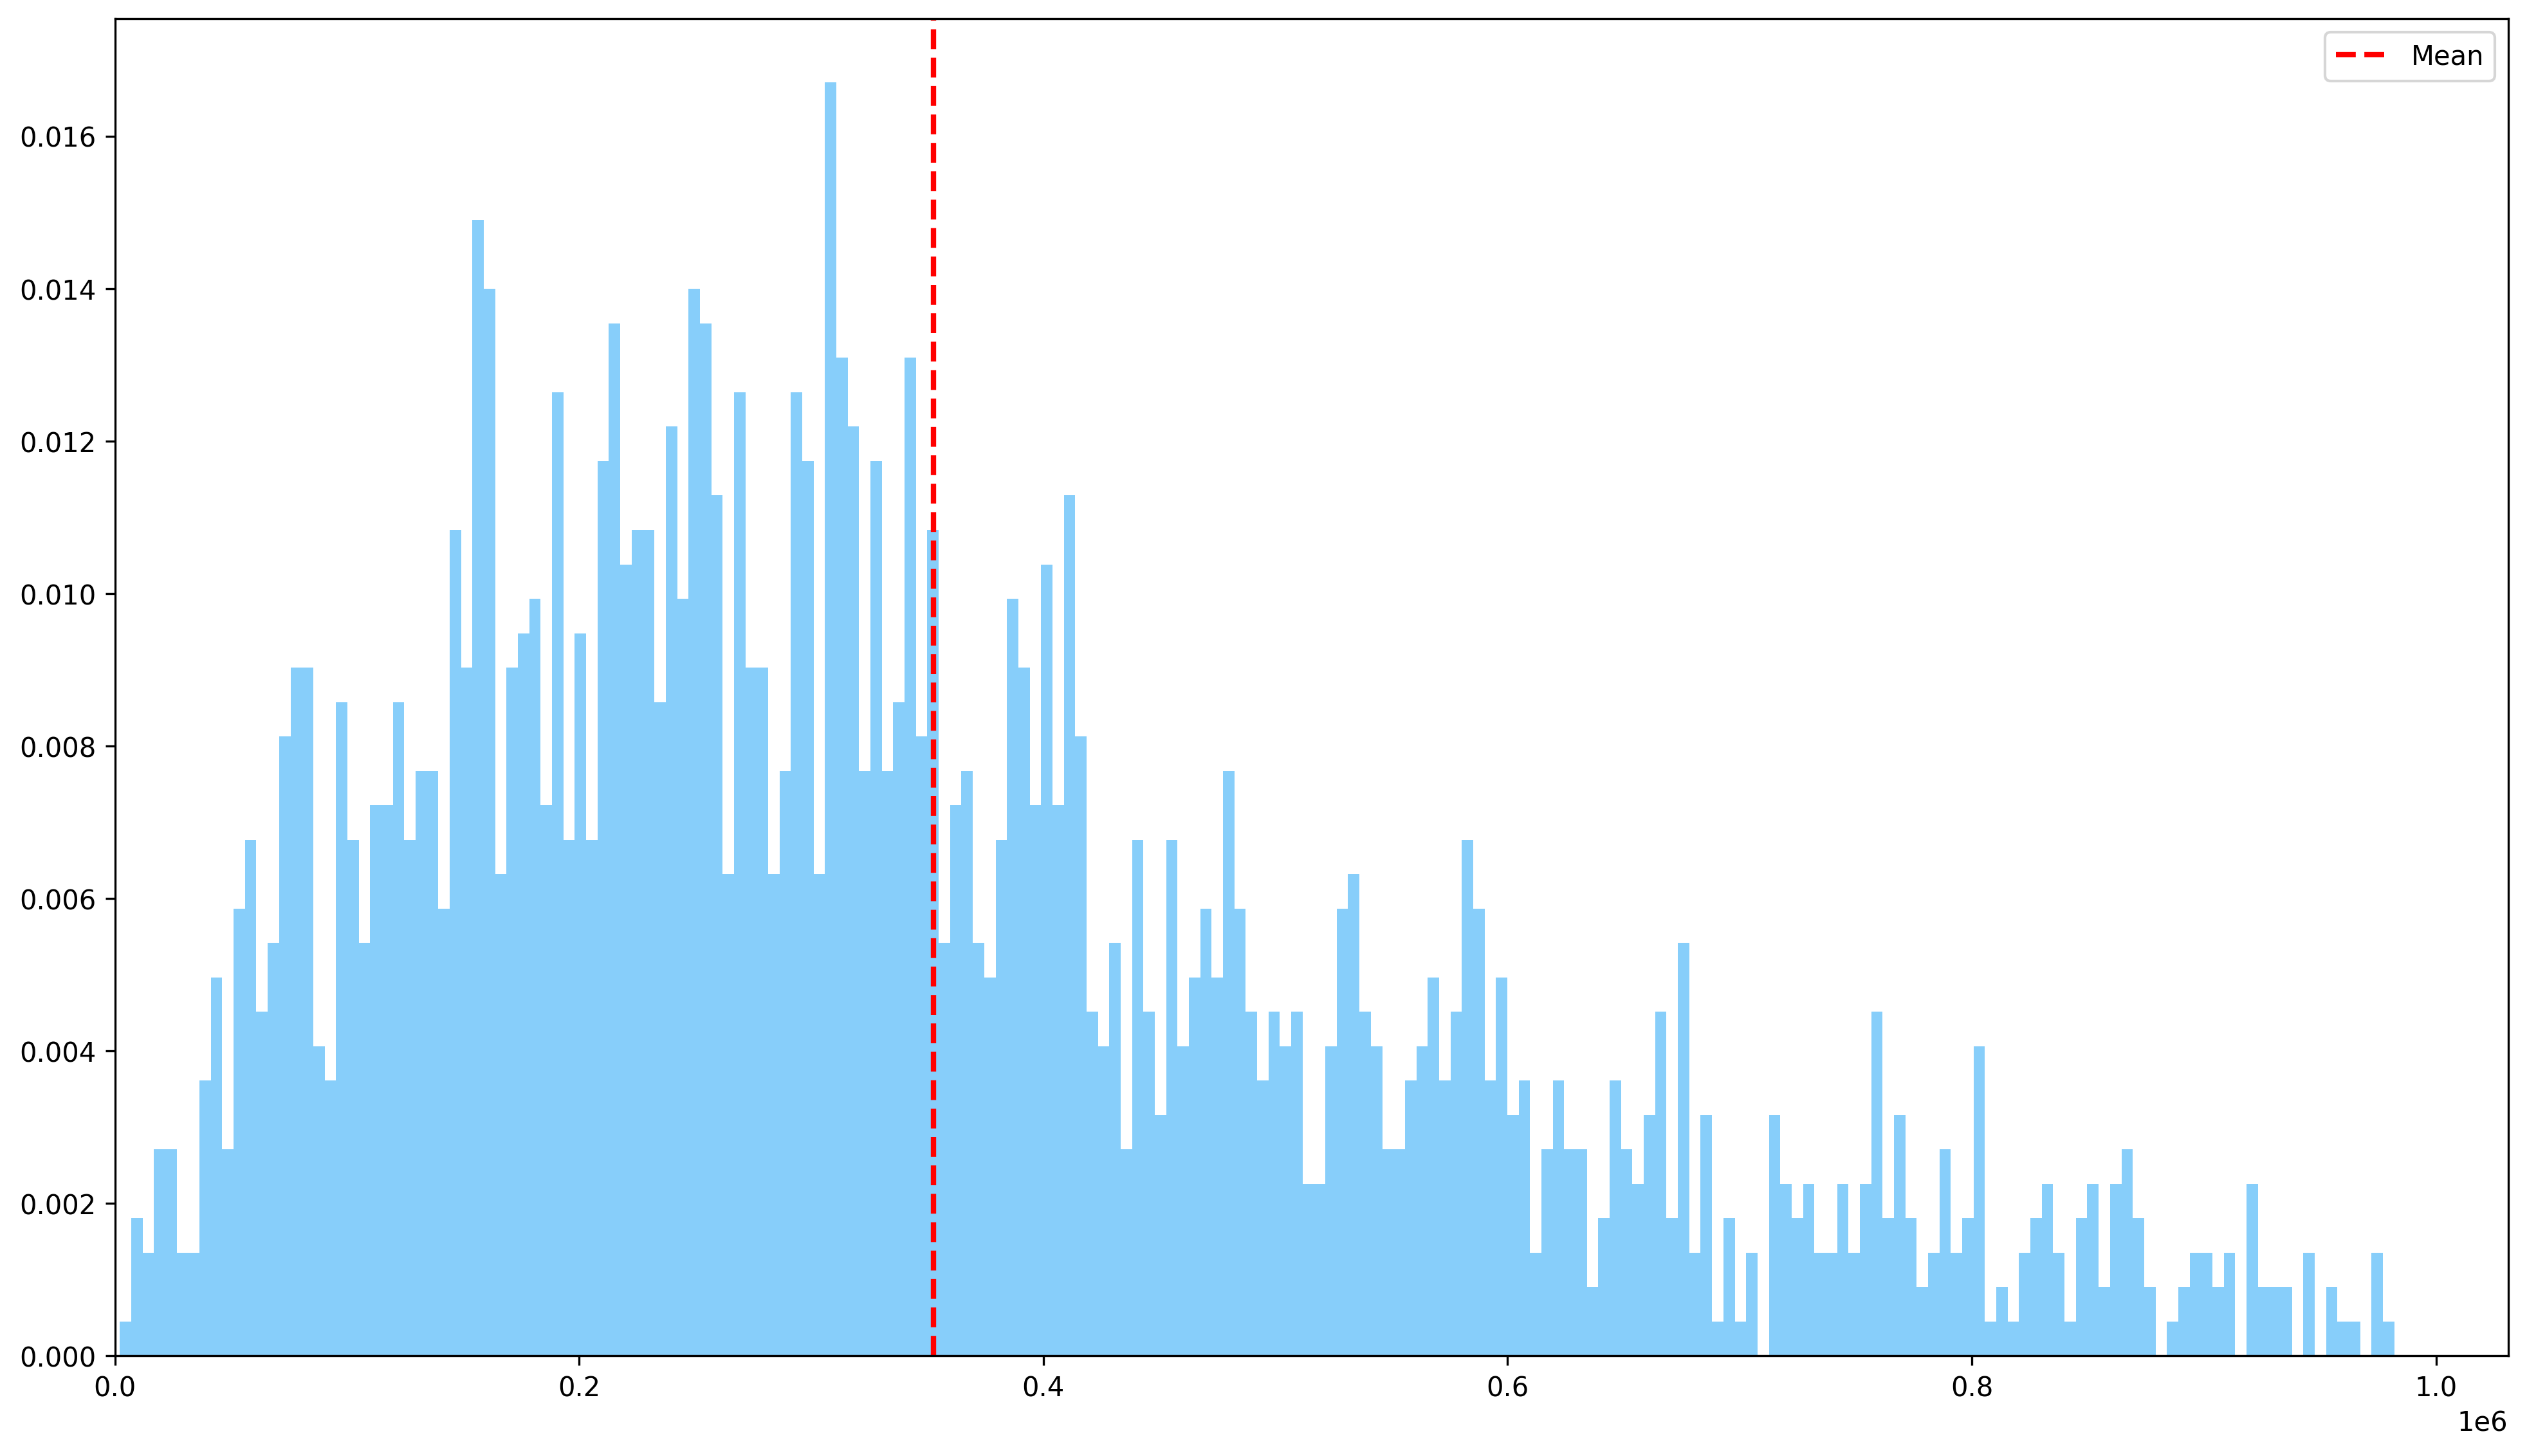

(array([ 1,  4,  3,  6,  6,  3,  3,  8, 11,  6, 13, 15, 10, 12, 18, 20, 20,
         9,  8, 19, 15, 12, 16, 16, 19, 15, 17, 17, 13, 24, 20, 33, 31, 14,
        20, 21, 22, 16, 28, 15, 21, 15, 26, 30, 23, 24, 24, 19, 27, 22, 31,
        30, 25, 14, 28, 20, 20, 14, 17, 28, 26, 14, 37, 29, 27, 17, 26, 17,
        19, 29, 18, 24, 12, 16, 17, 12, 11, 15, 22, 20, 16, 23, 16, 25, 18,
        10,  9, 12,  6, 15, 10,  7, 15,  9, 11, 13, 11, 17, 13, 10,  8, 10,
         9, 10,  5,  5,  9, 13, 14, 10,  9,  6,  6,  8,  9, 11,  8, 10, 15,
        13,  8, 11,  7,  8,  3,  6,  8,  6,  6,  2,  4,  8,  6,  5,  7, 10,
         4, 12,  3,  7,  1,  4,  1,  3,  0,  7,  5,  4,  5,  3,  3,  5,  3,
         5, 10,  4,  7,  4,  2,  3,  6,  3,  4,  9,  1,  2,  1,  3,  4,  5,
         3,  1,  4,  5,  2,  5,  6,  4,  2,  0,  1,  2,  3,  3,  2,  3,  0,
         5,  2,  2,  2,  0,  3,  0,  2,  1,  1,  0,  3,  1]),
 array([  4620.        ,   9519.04285714,  14418.08571429,  19317.12857143,
         24216.17142857,  

In [10]:


distribution_analysis(data, bins=30)

In [10]:
stats[data > 1e6]

los_ad                                           \
                       mean              min               max count   
subject_id                                                             
10115397   40 days 00:08:00 40 days 00:08:00  40 days 00:08:00     1   
10149929   12 days 05:55:00 12 days 05:55:00  12 days 05:55:00     1   
10285517   17 days 00:16:00 17 days 00:16:00  17 days 00:16:00     1   
10358623   19 days 23:50:00 19 days 23:50:00  19 days 23:50:00     1   
10383715   15 days 01:29:40  4 days 03:28:00  20 days 19:31:00     6   
...                     ...              ...               ...   ...   
19687069   36 days 20:12:00 36 days 20:12:00  36 days 20:12:00     1   
19689911   13 days 13:29:00 13 days 13:29:00  13 days 13:29:00     1   
19899841   11 days 21:55:00 11 days 21:55:00  11 days 21:55:00     1   
19940147   22 days 01:11:45  2 days 23:01:00  47 days 00:13:00    12   
19970491   17 days 00:09:20  1 days 11:32:00 133 days 02:18:00    24   

                              los_dp                                        
                                mean             min             max count  
subject_id                                                                  
10115397             0 days 04:55:00 0 days 04:55:00 0 days 04:55:00     1  
10149929                         NaT             NaT             NaT     0  
10285517             0 days 04:32:00 0 days 04:32:00 0 days 04:32:00     1  
10358623             0 days 05:19:00 0 days 05:19:00 0 days 05:19:00     1  
10383715             0 days 05:35:30 0 days 04:01:00 0 days 07:10:00     4  
...                              ...             ...             ...   ...  
19687069             0 days 06:19:00 0 days 06:19:00 0 days 06:19:00     1  
19689911             0 days 08:56:00 0 days 08:56:00 0 days 08:56:00     1  
19899841             0 days 05:28:00 0 days 05:28:00 0 days 05:28:00     1  
19940147             0 days 05:59:00 0 days 05:59:00 0 days 05:59:00     1  
19970491   0 days 05:35:53.333333333 0 days 01:04:00 0 days 07:12:00    18  

[133 rows x 8 columns]

In [11]:
stats[stats.index.isin(both_ibd_patients)]

los_ad                                          \
                                mean              min              max count   
subject_id                                                                     
10149624             2 days 10:10:40  0 days 20:29:00  3 days 23:44:00    24   
10303503             5 days 13:36:10  0 days 16:29:00 17 days 18:12:00   456   
10645926            12 days 12:00:45  2 days 19:06:00 22 days 01:53:00    72   
10740917            30 days 02:57:00 30 days 02:57:00 30 days 02:57:00     2   
10767777   3 days 06:13:26.666666666  0 days 00:12:00 14 days 22:30:00   324   
...                              ...              ...              ...   ...   
19052042            12 days 01:19:00  2 days 22:13:00 50 days 21:00:00    14   
19481280             7 days 00:51:00  0 days 15:32:00 16 days 21:31:00    15   
19813574             1 days 08:02:00  1 days 03:19:00  1 days 12:45:00     4   
19846637             2 days 13:42:20  1 days 15:09:00  4 days 10:30:00     9   
19871828             4 days 03:58:20  1 days 02:22:00  9 days 15:27:00     9   

                              los_dp                                        
                                mean             min             max count  
subject_id                                                                  
10149624             0 days 04:54:00 0 days 03:16:00 0 days 07:04:00    16  
10303503   0 days 08:00:44.210526315 0 days 03:29:00 0 days 15:23:00   361  
10645926             0 days 05:52:15 0 days 03:18:00 0 days 08:27:00    36  
10740917             0 days 03:48:00 0 days 03:48:00 0 days 03:48:00     2  
10767777             0 days 05:58:00 0 days 02:05:00 0 days 14:25:00   306  
...                              ...             ...             ...   ...  
19052042             0 days 14:52:30 0 days 07:26:00 0 days 22:19:00     4  
19481280             0 days 08:35:48 0 days 03:32:00 0 days 20:18:00    15  
19813574             0 days 04:24:00 0 days 04:01:00 0 days 04:47:00     4  
19846637             0 days 06:46:00 0 days 05:52:00 0 days 07:40:00     6  
19871828             0 days 05:09:00 0 days 04:36:00 0 days 05:42:00     6  

[85 rows x 8 columns]

# ICU LOS

In [11]:
df = pd.read_csv(os.path.join(DATA_DIR, 'outcome', 'icu_stay.csv'))

df = df.drop_duplicates(subset=['subject_id', 'stay_id']).dropna(subset=['stay_id'])

df.head()

,subject_id,stay_id,los,dod
1,10303503,37900721.0,0.316667,NaN
2,10303503,30774040.0,1.263980,NaN
3,10303503,33780253.0,1.961840,NaN
14,10509294,34569667.0,1.682920,NaN
15,10509294,37833895.0,2.055210,NaN


In [12]:
stats = df.groupby(['subject_id']).agg({
    'stay_id': 'first',
    'los': 'first', 
    'dod': 'first'
})

stats.head()

,stay_id,los,dod
subject_id,,,
10024331,34032345.0,4.10571,2145-01-23
10025647,38572143.0,1.96810,2181-06-16
10037975,39061571.0,4.87824,2185-01-22
10048262,30774712.0,0.44588,None
10056223,30374531.0,5.04106,None


In [32]:
stats[stats.index.isin(both_ibd_patients)].shape

(34, 3)

In [37]:
data = np.array(stats.los)

# data = leave_percentile(data)


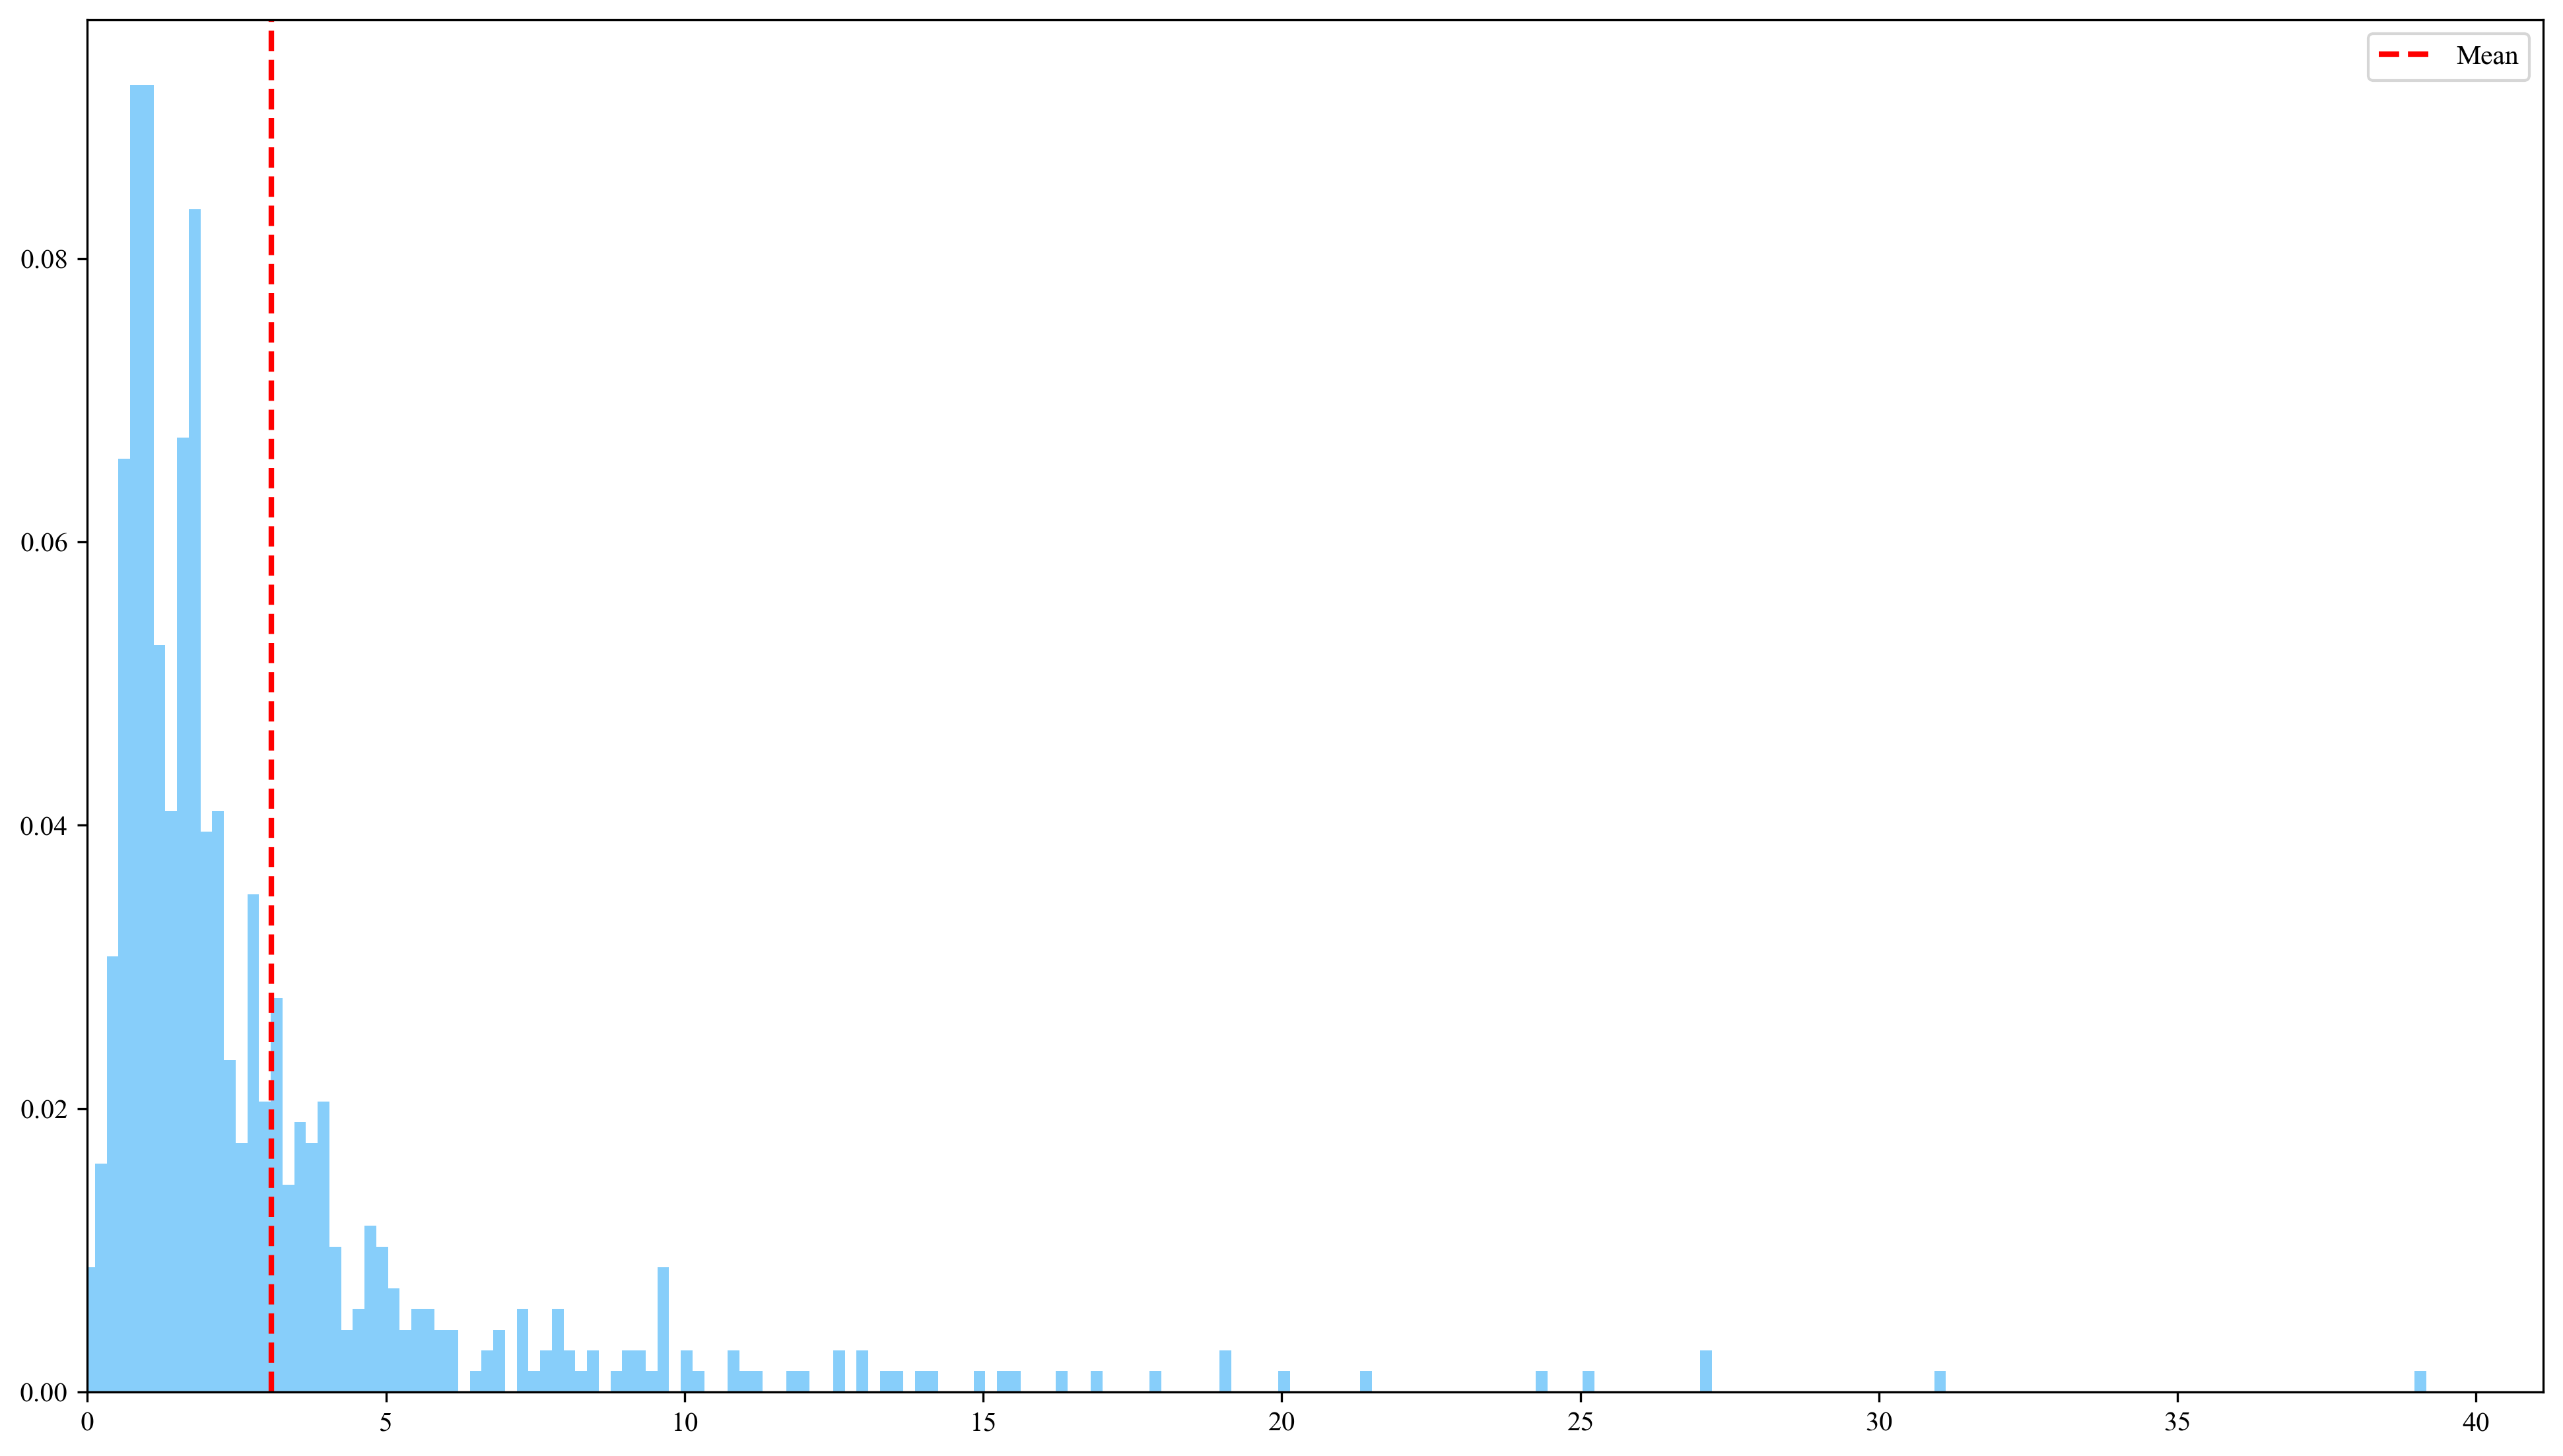

(array([ 6, 11, 21, 45, 63, 63, 36, 28, 46, 57, 27, 28, 16, 12, 24, 14, 19,
        10, 13, 12, 14,  7,  3,  4,  8,  7,  5,  3,  4,  4,  3,  3,  0,  1,
         2,  3,  0,  4,  1,  2,  4,  2,  1,  2,  0,  1,  2,  2,  1,  6,  0,
         2,  1,  0,  0,  2,  1,  1,  0,  0,  1,  1,  0,  0,  2,  0,  2,  0,
         1,  1,  0,  1,  1,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0,  1,  0,
         0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,
         1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1]),
 array([3.06944000e-02, 2.26860928e-01, 4.23027456e-01, 6.19193984e-01,
        8.15360512e-01, 1.0115

In [38]:
distribution_analysis(data, bins=20)